In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# Load prepared data

In [2]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [3]:
file_mean = save_path+"fmap_mean_32to38.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5046267,35,5,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
5046268,35,5,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
5046269,35,5,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
5046270,35,5,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 3 attributes
file_mean = save_path+"fmap_mean_roi_32to38.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'amp', 'neg', 'mean0', 'mean1', 'mean2', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, 'amp':int, 'neg':int})
df

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
0,32,1,0,0,0,2,0,-467.847626,-474.438446,-490.049805,2.608974
1,32,1,0,0,1,2,0,-624.234802,-630.178467,-644.649231,2.824424
2,32,1,0,0,2,2,0,-716.909119,-724.083923,-738.119629,3.062833
3,32,1,0,0,3,2,0,-737.430176,-744.375488,-758.378723,3.327526
4,32,1,0,0,4,2,0,-717.468018,-725.066650,-738.667725,3.622561
...,...,...,...,...,...,...,...,...,...,...,...
635355,38,6,18,18,39,2,1,-954.100403,-959.997986,-959.053711,-3.513359
635356,38,6,18,18,40,2,1,-963.235291,-969.107910,-968.167297,-3.225791
635357,38,6,18,18,41,2,1,-1004.292725,-1009.776916,-1009.972046,-2.967721
635358,38,6,18,18,42,2,1,-1063.031128,-1067.428955,-1068.936646,-2.735306


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635360 entries, 0 to 635359
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   exp       635360 non-null  int64  
 1   mini_exp  635360 non-null  int64  
 2   i         635360 non-null  int64  
 3   j         635360 non-null  int64  
 4   k         635360 non-null  int64  
 5   amp       635360 non-null  int64  
 6   neg       635360 non-null  int64  
 7   mean0     635360 non-null  float64
 8   mean1     635360 non-null  float64
 9   mean2     635360 non-null  float64
 10  theory    635360 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 53.3 MB


# Split data

## Data 1. fmap mean all experiments

In [6]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test1 =  df[(df['exp']==36) & (df['mini_exp']==6) & (df['neg']==1)]
df1_test2 =  df[(df['exp']==36) & (df['mini_exp']==6) & (df['neg']==0)]

In [7]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test1.shape)
print(df1_test2.shape)

(571824, 11)
(31768, 11)
(15884, 11)
(15884, 11)


In [8]:
X1_train = df1_train.iloc[:, 7:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 7:-1].values 
y1_test = df1_val['theory'].values

X1_pred1 = df1_test1.iloc[:, 7:-1].values 
y1_pred1 = df1_test1['theory'].values

X1_pred2 = df1_test2.iloc[:, 7:-1].values 
y1_pred2 = df1_test2['theory'].values

In [9]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred1.shape)
print(y1_pred1.shape)
print(X1_pred2.shape)
print(y1_pred2.shape)

(571824, 3)
(571824,)
(31768, 3)
(31768,)
(15884, 3)
(15884,)
(15884, 3)
(15884,)


# Create estimator

In [10]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [11]:
shape = (len(X_train[0]),)
def create_model():
#     model = keras.Sequential()
#     model.add(Dense(7, activation='relu', input_shape=shape)) 
#     model.add(Dense(7, activation='relu'))
#     model.add(Dense(7, activation='relu'))
#     model.add(Dense(7, activation='relu'))
#     model.add(Dense(7, activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(optimizer='RMSprop', loss='mse', metrics=["mean_squared_error"])
    
    model = keras.Sequential()
    model.add(Dense(3, activation='relu', input_shape=shape)) 
    model.add(Dense(3, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='Adam', loss='mse', metrics=["mean_squared_error"])

    return model

In [13]:
estimator = KerasRegressor(model=create_model, verbose=1)

# Visualizing validation curves

In [ ]:
param_grid = {
     'epochs': [25, 50, 100, 200, 300],
     'batch_size':[8, 16, 32, 64, 128, 256],
     'optimizer':['Adam', 'Adadelta', 'Adamax', 'RMSprop',  'SGD'],
}

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
2023-05-21 11:15:54.038282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 11:15:54.038282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 11:15:54.039712: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions 

Epoch 1/50
Epoch 1/300
Epoch 1/100
Epoch 1/200
14296/14296 [==============================] - 21s 1ms/step - loss: 87.4096 - mean_squared_error: 87.4096
Epoch 2/300
14296/14296 [==============================] - 21s 1ms/step - loss: 149.6294 - mean_squared_error: 149.6294
Epoch 2/50
14296/14296 [==============================] - 21s 1ms/step - loss: 46.5181 - mean_squared_error: 46.5181
Epoch 2/200
14296/14296 [==============================] - 21s 1ms/step - loss: 683.4359 - mean_squared_error: 683.4359
Epoch 2/100
14296/14296 [==============================] - 19s 1ms/step - loss: 23.0147 - mean_squared_error: 23.0147
Epoch 3/300
14296/14296 [==============================] - 19s 1ms/step - loss: 46.4443 - mean_squared_error: 46.4443
Epoch 3/50
14296/14296 [==============================] - 19s 1ms/step - loss: 12.7251 - mean_squared_error: 12.7251
Epoch 3/200
14296/14296 [==============================] - 19s 1ms/step - loss: 42.6577 - mean_squared_error: 42.6577
Epoch 3/100
14296/1

14296/14296 [==============================] - 20s 1ms/step - loss: 4.4256 - mean_squared_error: 4.4256
Epoch 18/200
14296/14296 [==============================] - 20s 1ms/step - loss: 4.4793 - mean_squared_error: 4.4793
Epoch 18/100
14296/14296 [==============================] - 19s 1ms/step - loss: 5.5021 - mean_squared_error: 5.5021
Epoch 19/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.8627 - mean_squared_error: 3.8627
Epoch 19/50
14296/14296 [==============================] - 19s 1ms/step - loss: 4.3623 - mean_squared_error: 4.3623
Epoch 19/200
14296/14296 [==============================] - 19s 1ms/step - loss: 4.4286 - mean_squared_error: 4.4286
Epoch 19/100
14296/14296 [==============================] - 19s 1ms/step - loss: 5.3974 - mean_squared_error: 5.3974======================>.......] - ETA: 4s - loss: 4.3256 - mean_squared_error: 4.32
Epoch 20/300
14296/14296 [==============================] - 20s 1ms/step - loss: 3.8576 - mean_squared_error: 3.

14296/14296 [==============================] - 19s 1ms/step - loss: 3.6540 - mean_squared_error: 3.6540
Epoch 35/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7288 - mean_squared_error: 3.7288
Epoch 35/200
14296/14296 [==============================] - 20s 1ms/step - loss: 4.0356 - mean_squared_error: 4.0356
Epoch 35/100
14296/14296 [==============================] - 19s 1ms/step - loss: 4.1605 - mean_squared_error: 4.1605
Epoch 36/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6437 - mean_squared_error: 3.6437
Epoch 36/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7179 - mean_squared_error: 3.7179
Epoch 36/200
14296/14296 [==============================] - 20s 1ms/step - loss: 3.9871 - mean_squared_error: 3.9871
Epoch 36/100
14296/14296 [==============================] - 19s 1ms/step - loss: 4.1782 - mean_squared_error: 4.1782
Epoch 37/300
14296/14296 [==============================] - 20s 1ms/step - loss

14296/14296 [==============================] - 19s 1ms/step - loss: 3.5052 - mean_squared_error: 3.5052
Epoch 51/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.9045 - mean_squared_error: 3.9045
Epoch 51/100
14296/14296 [==============================] - 17s 1ms/step - loss: 4.0482 - mean_squared_error: 4.0482
Epoch 52/300
14296/14296 [==============================] - 17s 1ms/step - loss: 3.4732 - mean_squared_error: 3.4732
Epoch 52/200
14296/14296 [==============================] - 17s 1ms/step - loss: 3.9074 - mean_squared_error: 3.9074
Epoch 52/100
14296/14296 [==============================] - 17s 1ms/step - loss: 4.0031 - mean_squared_error: 4.0031
Epoch 53/300
14296/14296 [==============================] - 17s 1ms/step - loss: 3.4659 - mean_squared_error: 3.4659
Epoch 53/200
14296/14296 [==============================] - 16s 1ms/step - loss: 3.9032 - mean_squared_error: 3.9032
Epoch 53/100
14296/14296 [==============================] - 17s 1ms/step - lo

14296/14296 [==============================] - 19s 1ms/step - loss: 3.3702 - mean_squared_error: 3.3702
Epoch 68/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.8918 - mean_squared_error: 3.8918
Epoch 69/300
14296/14296 [==============================] - 20s 1ms/step - loss: 4.1103 - mean_squared_error: 4.1103
Epoch 15/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3731 - mean_squared_error: 3.3731
Epoch 69/200
14296/14296 [==============================] - 20s 1ms/step - loss: 3.7794 - mean_squared_error: 3.7794
Epoch 69/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.8885 - mean_squared_error: 3.8885
Epoch 70/300
14296/14296 [==============================] - 20s 1ms/step - loss: 4.0694 - mean_squared_error: 4.0694
Epoch 16/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3554 - mean_squared_error: 3.3554
Epoch 70/200
14296/14296 [==============================] - 20s 1ms/step - lo

14296/14296 [==============================] - 19s 1ms/step - loss: 3.7662 - mean_squared_error: 3.7662
Epoch 85/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7848 - mean_squared_error: 3.7848
Epoch 86/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7738 - mean_squared_error: 3.7738
Epoch 32/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3420 - mean_squared_error: 3.3420
Epoch 86/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7578 - mean_squared_error: 3.7578
Epoch 86/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7691 - mean_squared_error: 3.7691
Epoch 87/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.8310 - mean_squared_error: 3.8310
Epoch 33/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3441 - mean_squared_error: 3.3441
Epoch 87/200
14296/14296 [==============================] - 19s 1ms/step - lo

14296/14296 [==============================] - 19s 1ms/step - loss: 3.6995 - mean_squared_error: 3.6995
Epoch 102/300
14296/14296 [==============================] - 18s 1ms/step - loss: 3.7303 - mean_squared_error: 3.7303
Epoch 48/500
14296/14296 [==============================] - 18s 1ms/step - loss: 3.3003 - mean_squared_error: 3.3003
Epoch 102/200
14296/14296 [==============================] - 18s 1ms/step - loss: 3.6693 - mean_squared_error: 3.6693 - ETA
Epoch 103/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7154 - mean_squared_error: 3.7154
Epoch 49/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2691 - mean_squared_error: 3.269124
Epoch 103/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6875 - mean_squared_error: 3.6875
Epoch 104/300
14296/14296 [==============================] - 20s 1ms/step - loss: 3.7358 - mean_squared_error: 3.7358
Epoch 50/500
14296/14296 [==============================] - 20s 

14296/14296 [==============================] - 20s 1ms/step - loss: 3.2534 - mean_squared_error: 3.2534
Epoch 118/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.5188 - mean_squared_error: 7.5188
Epoch 16/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6464 - mean_squared_error: 3.6464
Epoch 120/300
14296/14296 [==============================] - 20s 1ms/step - loss: 3.6491 - mean_squared_error: 3.6491
Epoch 65/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2442 - mean_squared_error: 3.2442
Epoch 119/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.4973 - mean_squared_error: 7.4973
Epoch 17/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6383 - mean_squared_error: 3.6383
Epoch 121/300
14296/14296 [==============================] - 20s 1ms/step - loss: 3.6868 - mean_squared_error: 3.6868
Epoch 66/500
14296/14296 [==============================] - 19s 1ms/step - 

14296/14296 [==============================] - 19s 1ms/step - loss: 3.2452 - mean_squared_error: 3.2452
Epoch 135/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.2878 - mean_squared_error: 7.2878
Epoch 33/50
14296/14296 [==============================] - 20s 1ms/step - loss: 3.6311 - mean_squared_error: 3.6311
Epoch 137/300
14296/14296 [==============================] - 20s 1ms/step - loss: 3.2212 - mean_squared_error: 3.2212
Epoch 136/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.2721 - mean_squared_error: 7.2721
Epoch 34/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6393 - mean_squared_error: 3.6393
Epoch 138/300
14296/14296 [==============================] - 20s 1ms/step - loss: 3.6889 - mean_squared_error: 3.6889
Epoch 83/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.2303 - mean_squared_error: 3.2303
Epoch 137/200
14296/14296 [==============================] - 20s 1ms/step -

14296/14296 [==============================] - 19s 1ms/step - loss: 3.6297 - mean_squared_error: 3.6297
Epoch 98/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.1393 - mean_squared_error: 7.1393
Epoch 50/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2233 - mean_squared_error: 3.2233
Epoch 153/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6644 - mean_squared_error: 3.6644
Epoch 99/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2085 - mean_squared_error: 3.2085
Epoch 154/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6241 - mean_squared_error: 3.6241
Epoch 100/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6158 - mean_squared_error: 3.6158
Epoch 156/300
14296/14296 [==============================] - 18s 1ms/step - loss: 3.2163 - mean_squared_error: 3.2163
Epoch 155/200
14296/14296 [==============================] - 18s 1ms/step 

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


14296/14296 [==============================] - 18s 1ms/step - loss: 3.6239 - mean_squared_error: 3.6239
Epoch 157/300
 9849/14296 [===================>..........] - ETA: 5s - loss: 3.6212 - mean_squared_error: 3.6212

2023-05-21 12:06:41.831564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 18s 1ms/step - loss: 3.2143 - mean_squared_error: 3.2143
Epoch 156/200
14296/14296 [==============================] - 18s 1ms/step - loss: 3.6469 - mean_squared_error: 3.6469
Epoch 102/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6040 - mean_squared_error: 3.6040
Epoch 158/300
14296/14296 [==============================] - 20s 1ms/step - loss: 71.0355 - mean_squared_error: 71.0355
Epoch 2/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2344 - mean_squared_error: 3.2344
Epoch 157/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.7141 - mean_squared_error: 3.7141
Epoch 103/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.6226 - mean_squared_error: 3.6226
Epoch 159/300
14296/14296 [==============================] - 19s 1ms/step - loss: 21.1517 - mean_squared_error: 21.1517
Epoch 3/100
14296/14296 [==============================] - 19s 1ms/s

14296/14296 [==============================] - 19s 1ms/step - loss: 10.1528 - mean_squared_error: 10.1528
Epoch 18/100
14296/14296 [==============================] - 20s 1ms/step - loss: 3.1695 - mean_squared_error: 3.1695
Epoch 173/200
14296/14296 [==============================] - 21s 1ms/step - loss: 3.6206 - mean_squared_error: 3.6206
Epoch 119/500
14296/14296 [==============================] - 22s 2ms/step - loss: 3.6665 - mean_squared_error: 3.6665
Epoch 175/300
14296/14296 [==============================] - 23s 2ms/step - loss: 10.1826 - mean_squared_error: 10.1826
Epoch 19/100
14296/14296 [==============================] - 23s 2ms/step - loss: 3.6867 - mean_squared_error: 3.6867
Epoch 120/500
14296/14296 [==============================] - 23s 2ms/step - loss: 3.6248 - mean_squared_error: 3.624896 [============>.................] - ETA: 12s - loss: 3.1659 - mean_squared_error: 3.16
Epoch 176/300
14296/14296 [==============================] - 23s 2ms/step - loss: 10.1259 - mean_s

14296/14296 [==============================] - 23s 2ms/step - loss: 3.1315 - mean_squared_error: 3.1315
Epoch 188/200
14296/14296 [==============================] - 23s 2ms/step - loss: 3.5098 - mean_squared_error: 3.5098
Epoch 134/500
14296/14296 [==============================] - 23s 2ms/step - loss: 9.9800 - mean_squared_error: 9.9800 [======>.......................] - ETA: 16s - loss: 3.6898 - mean_squared_error: 3.689.................] - ETA: 16s - loss: 3.6836 - mean_squared_error: 3.683 ETA: 16s - loss: 3.6702 - mean_squared_error: 3.6706636 - mean_squared_error: 3.663error: 3.6
Epoch 34/100
14296/14296 [==============================] - 23s 2ms/step - loss: 3.1418 - mean_squared_error: 3.1418
Epoch 189/200
14296/14296 [==============================] - 23s 2ms/step - loss: 3.6137 - mean_squared_error: 3.6137
Epoch 191/300
14296/14296 [==============================] - 23s 2ms/step - loss: 3.5350 - mean_squared_error: 3.5350
Epoch 135/500
14296/14296 [===========================

14296/14296 [==============================] - 19s 1ms/step - loss: 3.4864 - mean_squared_error: 3.4864 - ET
Epoch 147/500
14296/14296 [==============================] - 19s 1ms/step - loss: 9.9399 - mean_squared_error: 9.9399
Epoch 47/100
14296/14296 [==============================] - 18s 1ms/step - loss: 3.5950 - mean_squared_error: 3.5950
Epoch 204/300
14296/14296 [==============================] - 18s 1ms/step - loss: 3.4520 - mean_squared_error: 3.452008
Epoch 148/500
14296/14296 [==============================] - 18s 1ms/step - loss: 9.8848 - mean_squared_error: 9.8848
Epoch 48/100
14296/14296 [==============================] - 18s 1ms/step - loss: 3.6026 - mean_squared_error: 3.6026
Epoch 205/300
14296/14296 [==============================] - 19s 1ms/step - loss: 100.8464 - mean_squared_error: 100.8464
Epoch 2/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.4607 - mean_squared_error: 3.4607
Epoch 149/500
14296/14296 [==============================] - 19

14296/14296 [==============================] - 19s 1ms/step - loss: 17.6709 - mean_squared_error: 17.6709
Epoch 17/200
14296/14296 [==============================] - 19s 1ms/step - loss: 9.8549 - mean_squared_error: 9.8549
Epoch 64/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.4731 - mean_squared_error: 3.4731
Epoch 164/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.5740 - mean_squared_error: 3.5740
Epoch 221/300
14296/14296 [==============================] - 19s 1ms/step - loss: 18.0579 - mean_squared_error: 18.0579
Epoch 18/200
14296/14296 [==============================] - 19s 1ms/step - loss: 9.8817 - mean_squared_error: 9.8817
Epoch 65/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.4414 - mean_squared_error: 3.4414
Epoch 165/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.5990 - mean_squared_error: 3.5990
Epoch 222/300
14296/14296 [==============================] - 19s 1ms/s

14296/14296 [==============================] - 19s 1ms/step - loss: 3.5819 - mean_squared_error: 3.5819
Epoch 237/300
14296/14296 [==============================] - 19s 1ms/step - loss: 17.1301 - mean_squared_error: 17.1301
Epoch 34/200
14296/14296 [==============================] - 19s 1ms/step - loss: 9.8801 - mean_squared_error: 9.8801
Epoch 81/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3937 - mean_squared_error: 3.3937
Epoch 181/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.5839 - mean_squared_error: 3.5839
Epoch 238/300
14296/14296 [==============================] - 19s 1ms/step - loss: 16.4452 - mean_squared_error: 16.4452
Epoch 35/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3930 - mean_squared_error: 3.3930
Epoch 182/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.5529 - mean_squared_error: 3.5529
Epoch 239/300
14296/14296 [==============================] - 19s 1ms/

14296/14296 [==============================] - 19s 1ms/step - loss: 9.7936 - mean_squared_error: 9.7936
Epoch 97/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3903 - mean_squared_error: 3.3903
Epoch 197/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.3464 - mean_squared_error: 8.3464
Epoch 51/200
14296/14296 [==============================] - 19s 1ms/step - loss: 9.7887 - mean_squared_error: 9.7887
Epoch 98/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3836 - mean_squared_error: 3.3836
Epoch 198/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.5683 - mean_squared_error: 3.5683
Epoch 255/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.1780 - mean_squared_error: 8.1780
Epoch 52/200
14296/14296 [==============================] - 19s 1ms/step - loss: 9.8610 - mean_squared_error: 9.8610
Epoch 99/100
14296/14296 [==============================] - 19s 1ms/step -

14296/14296 [==============================] - 19s 1ms/step - loss: 8.3260 - mean_squared_error: 8.3260
Epoch 12/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3724 - mean_squared_error: 3.3724
Epoch 213/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5806 - mean_squared_error: 7.5806
Epoch 67/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.5633 - mean_squared_error: 3.5633
Epoch 271/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.2492 - mean_squared_error: 8.2492
Epoch 13/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3688 - mean_squared_error: 3.3688
Epoch 214/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6214 - mean_squared_error: 7.6214
Epoch 68/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.5441 - mean_squared_error: 3.5441
Epoch 272/300
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 20s 1ms/step - loss: 7.8776 - mean_squared_error: 7.8776
Epoch 29/300


11076/14296 [======================>.......] - ETA: 4s - loss: 7.4595 - mean_squared_error: 7.4595

14296/14296 [==============================] - 20s 1ms/step - loss: 7.4636 - mean_squared_error: 7.4636
Epoch 84/200
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3644 - mean_squared_error: 3.3644
Epoch 230/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.4976 - mean_squared_error: 3.4976
Epoch 288/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9309 - mean_squared_error: 7.9309
Epoch 30/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4224 - mean_squared_error: 7.4224
Epoch 85/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3598 - mean_squared_error: 3.3598
Epoch 231/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.4973 - mean_squared_error: 3.4973
Epoch 289/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9122 - mean_squared_error: 7.9122
Epoch 31/300
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 21s 1ms/step - loss: 3.3369 - mean_squared_error: 3.3369
Epoch 246/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.7736 - mean_squared_error: 7.7736
Epoch 46/300
14296/14296 [==============================] - 20s 1ms/step - loss: 7.3436 - mean_squared_error: 7.3436
Epoch 101/200
14296/14296 [==============================] - 20s 1ms/step - loss: 208.2545 - mean_squared_error: 208.2545
Epoch 3/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3566 - mean_squared_error: 3.3566
Epoch 247/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.7637 - mean_squared_error: 7.7637
Epoch 47/300
14296/14296 [==============================] - 20s 1ms/step - loss: 7.3825 - mean_squared_error: 7.3825
Epoch 102/200
14296/14296 [==============================] - 20s 1ms/step - loss: 208.2540 - mean_squared_error: 208.2540
Epoch 4/500
14296/14296 [==============================] - 20s 1ms

13926/14296 [============================>.] - ETA: 0s - loss: 208.2482 - mean_squared_error: 208.2482

14296/14296 [==============================] - 20s 1ms/step - loss: 208.2544 - mean_squared_error: 208.2544
Epoch 19/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3400 - mean_squared_error: 3.3400
Epoch 263/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6857 - mean_squared_error: 7.6857
Epoch 63/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3544 - mean_squared_error: 7.3544
Epoch 118/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2549 - mean_squared_error: 208.2549
Epoch 20/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3443 - mean_squared_error: 3.3443
Epoch 264/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.6892 - mean_squared_error: 7.6892
Epoch 64/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3397 - mean_squared_error: 7.3397
Epoch 119/200
14296/14296 [==============================] - 19s 1

14296/14296 [==============================] - 19s 1ms/step - loss: 7.6441 - mean_squared_error: 7.6441
Epoch 79/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4089 - mean_squared_error: 7.4089
Epoch 134/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2529 - mean_squared_error: 208.2529
Epoch 36/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3303 - mean_squared_error: 3.3303
Epoch 280/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6353 - mean_squared_error: 7.6353
Epoch 80/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3598 - mean_squared_error: 7.3598
Epoch 135/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2551 - mean_squared_error: 208.2551
Epoch 37/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3303 - mean_squared_error: 3.3303
Epoch 281/500
14296/14296 [==============================] - 20s 1

14296/14296 [==============================] - 20s 1ms/step - loss: 3.3207 - mean_squared_error: 3.3207
Epoch 296/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.5985 - mean_squared_error: 7.5985
Epoch 96/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8184 - mean_squared_error: 7.8184
Epoch 151/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2536 - mean_squared_error: 208.2536
Epoch 53/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3273 - mean_squared_error: 3.3273
Epoch 297/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5980 - mean_squared_error: 7.5980
Epoch 97/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3552 - mean_squared_error: 7.3552
Epoch 152/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2545 - mean_squared_error: 208.2545
Epoch 54/500
14296/14296 [==============================] - 19s 1

14296/14296 [==============================] - 20s 1ms/step - loss: 3.3121 - mean_squared_error: 3.3121
Epoch 312/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2532 - mean_squared_error: 208.2532
Epoch 69/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3416 - mean_squared_error: 7.3416
Epoch 168/200
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3251 - mean_squared_error: 3.3251
Epoch 313/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2539 - mean_squared_error: 208.2539
Epoch 70/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4002 - mean_squared_error: 7.4002
Epoch 169/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5792 - mean_squared_error: 7.5792
Epoch 114/300
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3247 - mean_squared_error: 3.3247
Epoch 314/500
14296/14296 [==============================] - 19s

14296/14296 [==============================] - 22s 2ms/step - loss: 3.3148 - mean_squared_error: 3.3148
Epoch 328/500
14296/14296 [==============================] - 21s 1ms/step - loss: 7.3335 - mean_squared_error: 7.3335
Epoch 184/200
14296/14296 [==============================] - 21s 2ms/step - loss: 7.5637 - mean_squared_error: 7.5637
Epoch 129/300
14296/14296 [==============================] - 21s 1ms/step - loss: 208.2534 - mean_squared_error: 208.2534
Epoch 86/500
14296/14296 [==============================] - 22s 2ms/step - loss: 3.3111 - mean_squared_error: 3.3111
Epoch 329/500
14296/14296 [==============================] - 21s 1ms/step - loss: 7.3553 - mean_squared_error: 7.3553
Epoch 185/200
14296/14296 [==============================] - 21s 1ms/step - loss: 7.5564 - mean_squared_error: 7.5564
Epoch 130/300
14296/14296 [==============================] - 21s 1ms/step - loss: 208.2548 - mean_squared_error: 208.2548
Epoch 87/500
14296/14296 [==============================] - 22s

14296/14296 [==============================] - 22s 2ms/step - loss: 3.3146 - mean_squared_error: 3.3146
Epoch 344/500
14296/14296 [==============================] - 21s 1ms/step - loss: 7.3178 - mean_squared_error: 7.3178
Epoch 200/200
14296/14296 [==============================] - 21s 2ms/step - loss: 7.5351 - mean_squared_error: 7.5351
Epoch 145/300
14296/14296 [==============================] - 22s 2ms/step - loss: 208.2550 - mean_squared_error: 208.2550
Epoch 102/500
14296/14296 [==============================] - 22s 2ms/step - loss: 3.3128 - mean_squared_error: 3.3128
Epoch 345/500
14296/14296 [==============================] - 21s 1ms/step - loss: 7.5410 - mean_squared_error: 7.5410
Epoch 146/300
14296/14296 [==============================] - 21s 1ms/step - loss: 208.2539 - mean_squared_error: 208.2539
Epoch 103/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3298 - mean_squared_error: 3.3298
Epoch 346/500
14296/14296 [==============================] - 2

2023-05-21 13:29:34.759975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 20s 1ms/step - loss: 7.5363 - mean_squared_error: 7.5363
Epoch 149/300
14296/14296 [==============================] - 20s 1ms/step - loss: 208.2538 - mean_squared_error: 208.2538
Epoch 106/500
14296/14296 [==============================] - 22s 2ms/step - loss: 7.5434 - mean_squared_error: 7.5434
Epoch 150/300
14296/14296 [==============================] - 22s 2ms/step - loss: 208.2551 - mean_squared_error: 208.2551
Epoch 107/500
14296/14296 [==============================] - 22s 2ms/step - loss: 3.3086 - mean_squared_error: 3.3086
Epoch 350/500
14296/14296 [==============================] - 21s 2ms/step - loss: 208.4978 - mean_squared_error: 208.4978
Epoch 3/50
14296/14296 [==============================] - 22s 2ms/step - loss: 7.5174 - mean_squared_error: 7.5174
Epoch 151/300
14296/14296 [==============================] - 22s 2ms/step - loss: 3.3220 - mean_squared_error: 3.3220
Epoch 351/500
14296/14296 [==============================] - 

14296/14296 [==============================] - 19s 1ms/step - loss: 3.3123 - mean_squared_error: 3.3123
Epoch 363/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4875 - mean_squared_error: 7.4875
Epoch 164/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2543 - mean_squared_error: 208.2543
Epoch 121/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3091 - mean_squared_error: 3.3091
Epoch 364/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4966 - mean_squared_error: 208.4966
Epoch 17/50
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5113 - mean_squared_error: 7.5113
Epoch 165/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2540 - mean_squared_error: 208.2540
Epoch 122/500
14296/14296 [==============================] - 20s 1ms/step - loss: 3.3057 - mean_squared_error: 3.3057
Epoch 365/500
14296/14296 [==============================] -

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4657 - mean_squared_error: 7.4657
Epoch 180/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2551 - mean_squared_error: 208.2551
Epoch 137/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4964 - mean_squared_error: 208.4964
Epoch 33/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2912 - mean_squared_error: 3.2912
Epoch 380/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4878 - mean_squared_error: 7.4878
Epoch 181/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2542 - mean_squared_error: 208.2542
Epoch 138/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4942 - mean_squared_error: 208.4942
Epoch 34/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2952 - mean_squared_error: 3.2952
Epoch 381/500
14296/14296 [==============================]

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4759 - mean_squared_error: 7.4759
Epoch 197/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2550 - mean_squared_error: 208.2550
Epoch 154/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4969 - mean_squared_error: 208.4969
Epoch 50/50
14296/14296 [==============================] - 19s 1ms/step - loss: 3.3009 - mean_squared_error: 3.3009
Epoch 397/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4624 - mean_squared_error: 7.4624
Epoch 198/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2931 - mean_squared_error: 3.2931
Epoch 398/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4546 - mean_squared_error: 7.4546
Epoch 199/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2546 - mean_squared_error: 208.2546
Epoch 156/500
14296/14296 [==============================] -

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4344 - mean_squared_error: 7.4344
Epoch 213/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0254 - mean_squared_error: 8.0254
Epoch 15/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2993 - mean_squared_error: 3.2993
Epoch 413/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4480 - mean_squared_error: 7.4480
Epoch 214/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9616 - mean_squared_error: 7.9616
Epoch 16/100
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2963 - mean_squared_error: 3.2963
Epoch 414/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4538 - mean_squared_error: 7.4538
Epoch 215/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2547 - mean_squared_error: 208.2547
Epoch 172/500
14296/14296 [==============================] - 19s 1ms

14296/14296 [==============================] - 23s 2ms/step - loss: 208.2551 - mean_squared_error: 208.2551
Epoch 185/500
14296/14296 [==============================] - 23s 2ms/step - loss: 7.8289 - mean_squared_error: 7.8289r: 3.249uared_error: 7.840 - mean_squared_error: 3.261......] - ETA: 20s - loss: 208.6391 - mean_squared_error: 208.639...........] - ETA: 14s - loss: 3.2434 - mean_squared_error: 3.2
Epoch 30/100
14296/14296 [==============================] - 23s 2ms/step - loss: 3.2945 - mean_squared_error: 3.2945
Epoch 428/500
14296/14296 [==============================] - 23s 2ms/step - loss: 7.4007 - mean_squared_error: 7.4007
Epoch 229/300
14296/14296 [==============================] - 23s 2ms/step - loss: 208.2546 - mean_squared_error: 208.2546
Epoch 186/500
14296/14296 [==============================] - 22s 2ms/step - loss: 7.8433 - mean_squared_error: 7.8433
Epoch 31/100
14296/14296 [==============================] - 23s 2ms/step - loss: 3.2961 - mean_squared_error: 3.2961

14296/14296 [==============================] - 23s 2ms/step - loss: 3.2836 - mean_squared_error: 3.2836
Epoch 443/500
14296/14296 [==============================] - 23s 2ms/step - loss: 7.4342 - mean_squared_error: 7.4342
Epoch 244/300
14296/14296 [==============================] - 23s 2ms/step - loss: 208.2505 - mean_squared_error: 208.2505
Epoch 201/500
14296/14296 [==============================] - 23s 2ms/step - loss: 3.2988 - mean_squared_error: 3.2988_error: 208.3458.3892 - mean_squared_
Epoch 444/500
14296/14296 [==============================] - 23s 2ms/step - loss: 7.4297 - mean_squared_error: 7.4297
Epoch 245/300
14296/14296 [==============================] - 23s 2ms/step - loss: 7.7795 - mean_squared_error: 7.7795
Epoch 47/100
14296/14296 [==============================] - 23s 2ms/step - loss: 3.2887 - mean_squared_error: 3.2887
Epoch 445/500
14296/14296 [==============================] - 23s 2ms/step - loss: 7.4406 - mean_squared_error: 7.4406
Epoch 246/300
14296/14296 [===

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4128 - mean_squared_error: 7.4128
Epoch 259/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2908 - mean_squared_error: 3.2908
Epoch 458/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2549 - mean_squared_error: 208.2549
Epoch 216/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7794 - mean_squared_error: 7.7794
Epoch 61/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4821 - mean_squared_error: 7.4821
Epoch 260/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2878 - mean_squared_error: 3.2878
Epoch 459/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2546 - mean_squared_error: 208.2546
Epoch 217/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7572 - mean_squared_error: 7.7572
Epoch 62/100
14296/14296 [==============================] - 19s

14296/14296 [==============================] - 19s 1ms/step - loss: 208.2546 - mean_squared_error: 208.2546
Epoch 232/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3863 - mean_squared_error: 7.3863
Epoch 276/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2813 - mean_squared_error: 3.2813
Epoch 475/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7319 - mean_squared_error: 7.7319
Epoch 78/100
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2544 - mean_squared_error: 208.2544
Epoch 233/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3963 - mean_squared_error: 7.3963
Epoch 277/300
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2825 - mean_squared_error: 3.2825
Epoch 476/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7503 - mean_squared_error: 7.7503
Epoch 79/100
14296/14296 [==============================] - 19s

14296/14296 [==============================] - 19s 1ms/step - loss: 208.2545 - mean_squared_error: 208.2545
Epoch 249/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2809 - mean_squared_error: 3.2809
Epoch 491/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3457 - mean_squared_error: 7.3457
Epoch 293/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7443 - mean_squared_error: 7.7443
Epoch 95/100
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2545 - mean_squared_error: 208.2545
Epoch 250/500
14296/14296 [==============================] - 19s 1ms/step - loss: 3.2910 - mean_squared_error: 3.2910
Epoch 492/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7433 - mean_squared_error: 7.7433
Epoch 96/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3801 - mean_squared_error: 7.3801
Epoch 294/300
14296/14296 [==============================] - 19s

2023-05-21 14:20:52.560273: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 16s 1ms/step - loss: 208.2538 - mean_squared_error: 208.2538
Epoch 260/500
14296/14296 [==============================] - 17s 1ms/step - loss: 208.5866 - mean_squared_error: 208.5866
Epoch 2/200
13247/14296 [==========================>...] - ETA: 1s - loss: 208.3050 - mean_squared_error: 208.3050

2023-05-21 14:21:16.017801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14091/14296 [============================>.] - ETA: 0s - loss: 208.2002 - mean_squared_error: 208.2002Epoch 1/500


2023-05-21 14:21:16.898713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 16s 1ms/step - loss: 208.2552 - mean_squared_error: 208.2552
Epoch 261/500
14296/14296 [==============================] - 18s 1ms/step - loss: 208.4978 - mean_squared_error: 208.4978
Epoch 3/200
14296/14296 [==============================] - 19s 1ms/step - loss: 195.8765 - mean_squared_error: 195.8765
Epoch 2/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2547 - mean_squared_error: 208.2547
Epoch 262/500
14296/14296 [==============================] - 20s 1ms/step - loss: 937.7173 - mean_squared_error: 937.7173
Epoch 2/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4968 - mean_squared_error: 208.4968
Epoch 4/200
14296/14296 [==============================] - 19s 1ms/step - loss: 188.3871 - mean_squared_error: 188.3871
Epoch 3/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2549 - mean_squared_error: 208.2549
Epoch 263/500
14296/14296 [=====================

14296/14296 [==============================] - 19s 1ms/step - loss: 208.4987 - mean_squared_error: 208.4987
Epoch 19/200
14296/14296 [==============================] - 19s 1ms/step - loss: 11.1671 - mean_squared_error: 11.1671
Epoch 18/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.3453 - mean_squared_error: 8.3453
Epoch 18/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2523 - mean_squared_error: 208.2523
Epoch 278/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4975 - mean_squared_error: 208.4975
Epoch 20/200
14296/14296 [==============================] - 19s 1ms/step - loss: 11.3461 - mean_squared_error: 11.3461
Epoch 19/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.3579 - mean_squared_error: 8.3579
Epoch 19/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4987 - mean_squared_error: 208.4987
Epoch 21/200
14296/14296 [==============================

14296/14296 [==============================] - 19s 1ms/step - loss: 8.1998 - mean_squared_error: 8.1998
Epoch 34/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2548 - mean_squared_error: 208.2548
Epoch 294/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4981 - mean_squared_error: 208.4981
Epoch 36/200
14296/14296 [==============================] - 19s 1ms/step - loss: 10.0028 - mean_squared_error: 10.0028
Epoch 35/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.1597 - mean_squared_error: 8.1597
Epoch 35/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2532 - mean_squared_error: 208.2532
Epoch 295/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4978 - mean_squared_error: 208.4978
Epoch 37/200
14296/14296 [==============================] - 19s 1ms/step - loss: 9.9537 - mean_squared_error: 9.9537
Epoch 36/300
14296/14296 [==============================]

14296/14296 [==============================] - 19s 1ms/step - loss: 9.3576 - mean_squared_error: 9.3576
Epoch 51/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0964 - mean_squared_error: 8.0964
Epoch 51/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2538 - mean_squared_error: 208.2538
Epoch 311/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4972 - mean_squared_error: 208.4972
Epoch 53/200
14296/14296 [==============================] - 19s 1ms/step - loss: 8.1107 - mean_squared_error: 8.1107
Epoch 52/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4976 - mean_squared_error: 208.4976
Epoch 54/200
14296/14296 [==============================] - 19s 1ms/step - loss: 9.2506 - mean_squared_error: 9.2506
Epoch 53/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.1262 - mean_squared_error: 8.1262
Epoch 53/500
14296/14296 [==============================] - 19s 

14296/14296 [==============================] - 19s 1ms/step - loss: 208.4979 - mean_squared_error: 208.4979
Epoch 69/200
14296/14296 [==============================] - 19s 1ms/step - loss: 8.8448 - mean_squared_error: 8.8448
Epoch 68/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2548 - mean_squared_error: 208.2548
Epoch 328/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0830 - mean_squared_error: 8.0830
Epoch 68/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4976 - mean_squared_error: 208.4976
Epoch 70/200
14296/14296 [==============================] - 19s 1ms/step - loss: 8.7933 - mean_squared_error: 8.7933
Epoch 69/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2536 - mean_squared_error: 208.2536
Epoch 329/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.1047 - mean_squared_error: 8.1047
Epoch 69/500
14296/14296 [==============================] -

14296/14296 [==============================] - 19s 1ms/step - loss: 208.2544 - mean_squared_error: 208.2544
Epoch 344/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4980 - mean_squared_error: 208.4980
Epoch 86/200
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0794 - mean_squared_error: 8.0794
Epoch 84/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0568 - mean_squared_error: 8.0568
Epoch 85/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4977 - mean_squared_error: 208.4977
Epoch 87/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2541 - mean_squared_error: 208.2541
Epoch 345/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0599 - mean_squared_error: 8.0599
Epoch 85/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4978 - mean_squared_error: 208.4978
Epoch 88/200
14296/14296 [=============================

14296/14296 [==============================] - 19s 1ms/step - loss: 8.0510 - mean_squared_error: 8.0510
Epoch 100/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4984 - mean_squared_error: 208.4984
Epoch 103/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2553 - mean_squared_error: 208.2553
Epoch 361/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7965 - mean_squared_error: 7.7965
Epoch 101/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0205 - mean_squared_error: 8.0205
Epoch 101/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4981 - mean_squared_error: 208.4981
Epoch 104/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2551 - mean_squared_error: 208.2551
Epoch 362/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7970 - mean_squared_error: 7.7970
Epoch 102/300
14296/14296 [===========================

14296/14296 [==============================] - 19s 1ms/step - loss: 208.4968 - mean_squared_error: 208.4968
Epoch 119/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2546 - mean_squared_error: 208.2546
Epoch 377/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7195 - mean_squared_error: 7.7195
Epoch 117/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9718 - mean_squared_error: 7.9718
Epoch 117/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4964 - mean_squared_error: 208.4964
Epoch 120/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2547 - mean_squared_error: 208.2547
Epoch 378/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7146 - mean_squared_error: 7.7146
Epoch 118/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4977 - mean_squared_error: 208.4977
Epoch 121/200
14296/14296 [=======================

14296/14296 [==============================] - 19s 1ms/step - loss: 208.2549 - mean_squared_error: 208.2549
Epoch 393/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7001 - mean_squared_error: 7.7001
Epoch 133/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9961 - mean_squared_error: 7.9961
Epoch 133/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4969 - mean_squared_error: 208.4969
Epoch 136/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2548 - mean_squared_error: 208.2548
Epoch 394/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7141 - mean_squared_error: 7.7141
Epoch 134/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9560 - mean_squared_error: 7.9560
Epoch 134/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4974 - mean_squared_error: 208.4974
Epoch 137/200
14296/14296 [===========================

14296/14296 [==============================] - 19s 1ms/step - loss: 7.8447 - mean_squared_error: 7.8447
Epoch 148/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2553 - mean_squared_error: 208.2553
Epoch 409/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6839 - mean_squared_error: 7.6839
Epoch 149/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8244 - mean_squared_error: 7.8244
Epoch 149/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4971 - mean_squared_error: 208.4971
Epoch 152/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2543 - mean_squared_error: 208.2543
Epoch 410/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6920 - mean_squared_error: 7.6920
Epoch 150/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8130 - mean_squared_error: 7.8130
Epoch 150/500
14296/14296 [==============================]

14296/14296 [==============================] - 19s 1ms/step - loss: 7.8063 - mean_squared_error: 7.8063
Epoch 164/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4968 - mean_squared_error: 208.4968
Epoch 167/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2555 - mean_squared_error: 208.2555
Epoch 425/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6666 - mean_squared_error: 7.6666
Epoch 165/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7922 - mean_squared_error: 7.7922
Epoch 165/500
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4951 - mean_squared_error: 208.4951
Epoch 168/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2537 - mean_squared_error: 208.2537
Epoch 426/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6629 - mean_squared_error: 7.6629
Epoch 166/300
14296/14296 [===========================

14296/14296 [==============================] - 19s 1ms/step - loss: 208.4980 - mean_squared_error: 208.4980
Epoch 183/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2535 - mean_squared_error: 208.2535
Epoch 441/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7922 - mean_squared_error: 7.7922
Epoch 181/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6476 - mean_squared_error: 7.6476
Epoch 181/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4982 - mean_squared_error: 208.4982
Epoch 184/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2548 - mean_squared_error: 208.2548
Epoch 442/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7870 - mean_squared_error: 7.7870
Epoch 182/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6422 - mean_squared_error: 7.6422
Epoch 182/300
14296/14296 [===========================

14296/14296 [==============================] - 19s 1ms/step - loss: 208.2547 - mean_squared_error: 208.2547
Epoch 456/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7851 - mean_squared_error: 7.7851
Epoch 196/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6277 - mean_squared_error: 7.6277
Epoch 196/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4977 - mean_squared_error: 208.4977
Epoch 199/200
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2551 - mean_squared_error: 208.2551
Epoch 457/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7842 - mean_squared_error: 7.7842
Epoch 197/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6340 - mean_squared_error: 7.6340
Epoch 197/300
14296/14296 [==============================] - 19s 1ms/step - loss: 208.4966 - mean_squared_error: 208.4966
Epoch 200/200
14296/14296 [===========================

14296/14296 [==============================] - 19s 1ms/step - loss: 208.2540 - mean_squared_error: 208.2540
Epoch 473/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7390 - mean_squared_error: 7.7390
Epoch 213/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6248 - mean_squared_error: 7.6248
Epoch 213/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8762 - mean_squared_error: 7.8762
Epoch 12/50
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2542 - mean_squared_error: 208.2542
Epoch 474/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6195 - mean_squared_error: 7.6195
Epoch 214/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7986 - mean_squared_error: 7.7986
Epoch 13/50
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2544 - mean_squared_error: 208.2544
Epoch 475/500
14296/14296 [==============================] - 1

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4535 - mean_squared_error: 7.4535
Epoch 28/50
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2547 - mean_squared_error: 208.2547
Epoch 490/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7448 - mean_squared_error: 7.7448
Epoch 230/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5990 - mean_squared_error: 7.5990
Epoch 230/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4722 - mean_squared_error: 7.4722
Epoch 29/50
14296/14296 [==============================] - 19s 1ms/step - loss: 208.2544 - mean_squared_error: 208.2544
Epoch 491/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7501 - mean_squared_error: 7.7501
Epoch 231/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6116 - mean_squared_error: 7.6116
Epoch 231/300
14296/14296 [==============================] - 19s 1

2023-05-21 15:38:33.966406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 18s 1ms/step - loss: 7.7470 - mean_squared_error: 7.7470
Epoch 243/500
14296/14296 [==============================] - 18s 1ms/step - loss: 7.5881 - mean_squared_error: 7.5881
Epoch 243/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3172 - mean_squared_error: 7.3172
Epoch 42/50
14296/14296 [==============================] - 19s 1ms/step - loss: 377.3195 - mean_squared_error: 377.3195
Epoch 2/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7332 - mean_squared_error: 7.7332
Epoch 244/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5999 - mean_squared_error: 7.5999
Epoch 244/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3163 - mean_squared_error: 7.3163
Epoch 43/50
14296/14296 [==============================] - 19s 1ms/step - loss: 48.5473 - mean_squared_error: 48.5473
Epoch 3/100
14296/14296 [==============================] - 19s 1ms/ste

14296/14296 [==============================] - 19s 1ms/step - loss: 8.2029 - mean_squared_error: 8.2029
Epoch 18/100
14296/14296 [==============================] - 19s 1ms/step - loss: 14.1401 - mean_squared_error: 14.1401
Epoch 7/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7243 - mean_squared_error: 7.7243
Epoch 260/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5952 - mean_squared_error: 7.5952
Epoch 260/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.1540 - mean_squared_error: 8.1540
Epoch 19/100
14296/14296 [==============================] - 19s 1ms/step - loss: 13.3022 - mean_squared_error: 13.3022
Epoch 8/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.7280 - mean_squared_error: 7.7280
Epoch 261/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.5861 - mean_squared_error: 7.5861
Epoch 261/300
14296/14296 [==============================] - 20s 1ms/ste

14296/14296 [==============================] - 19s 1ms/step - loss: 7.7594 - mean_squared_error: 7.7594
Epoch 276/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.2612 - mean_squared_error: 8.2612
Epoch 23/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5740 - mean_squared_error: 7.5740
Epoch 276/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5832 - mean_squared_error: 7.5832
Epoch 35/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7142 - mean_squared_error: 7.7142
Epoch 277/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.2713 - mean_squared_error: 8.2713
Epoch 24/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5757 - mean_squared_error: 7.5757
Epoch 277/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6370 - mean_squared_error: 7.6370
Epoch 36/100
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 20s 1ms/step - loss: 7.5376 - mean_squared_error: 7.5376
Epoch 51/100
14296/14296 [==============================] - 20s 1ms/step - loss: 7.7175 - mean_squared_error: 7.7175
Epoch 293/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.5528 - mean_squared_error: 7.5528
Epoch 293/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5552 - mean_squared_error: 7.5552
Epoch 52/100
14296/14296 [==============================] - 20s 1ms/step - loss: 7.6933 - mean_squared_error: 7.6933
Epoch 294/500
14296/14296 [==============================] - 20s 1ms/step - loss: 8.1463 - mean_squared_error: 8.1463
Epoch 41/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.5674 - mean_squared_error: 7.5674
Epoch 294/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5363 - mean_squared_error: 7.5363
Epoch 53/100
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 13.1076 - mean_squared_error: 13.1076
Epoch 7/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7440 - mean_squared_error: 7.7440
Epoch 309/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0642 - mean_squared_error: 8.0642
Epoch 56/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4536 - mean_squared_error: 7.4536
Epoch 68/100
14296/14296 [==============================] - 19s 1ms/step - loss: 12.5959 - mean_squared_error: 12.5959
Epoch 8/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7069 - mean_squared_error: 7.7069
Epoch 310/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4466 - mean_squared_error: 7.4466
Epoch 69/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7065 - mean_squared_error: 7.7065
Epoch 311/500
14296/14296 [==============================] - 19s 1ms/step

13009/14296 [==========================>...] - 

14296/14296 [==============================] - 21s 1ms/step - loss: 8.1135 - mean_squared_error: 8.1135
Epoch 23/300
14296/14296 [==============================] - 23s 2ms/step - loss: 7.7105 - mean_squared_error: 7.7105=======>...................] - ETA: 15s - loss: 7.3381 - mean_squared_error: 7.338mean_squared_error: 7
Epoch 325/500
14296/14296 [==============================] - 23s 2ms/step - loss: 8.0235 - mean_squared_error: 8.0235
Epoch 72/200
14296/14296 [==============================] - 22s 2ms/step - loss: 7.3624 - mean_squared_error: 7.3624
Epoch 84/100
14296/14296 [==============================] - 21s 1ms/step - loss: 8.0759 - mean_squared_error: 8.0759
Epoch 24/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7003 - mean_squared_error: 7.7003
Epoch 326/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0186 - mean_squared_error: 8.0186
Epoch 73/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3590 -

14296/14296 [==============================] - 19s 1ms/step - loss: 7.9838 - mean_squared_error: 7.9838
Epoch 86/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9343 - mean_squared_error: 7.9343
Epoch 38/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6899 - mean_squared_error: 7.6899
Epoch 340/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3045 - mean_squared_error: 7.3045
Epoch 99/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9525 - mean_squared_error: 7.9525
Epoch 87/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9531 - mean_squared_error: 7.9531
Epoch 39/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6923 - mean_squared_error: 7.6923
Epoch 341/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3348 - mean_squared_error: 7.3348
Epoch 100/100
14296/14296 [==============================] - 19s 1ms/step -

14296/14296 [==============================] - 19s 1ms/step - loss: 7.8965 - mean_squared_error: 7.8965
Epoch 54/300
14296/14296 [==============================] - 19s 1ms/step - loss: 9.7713 - mean_squared_error: 9.7713
Epoch 11/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6747 - mean_squared_error: 7.6747
Epoch 356/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9322 - mean_squared_error: 7.9322
Epoch 103/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9456 - mean_squared_error: 7.9456
Epoch 55/300
14296/14296 [==============================] - 19s 1ms/step - loss: 9.3911 - mean_squared_error: 9.3911
Epoch 12/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7491 - mean_squared_error: 7.7491
Epoch 357/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9229 - mean_squared_error: 7.9229
Epoch 104/200
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 8.0599 - mean_squared_error: 8.0599
Epoch 28/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6824 - mean_squared_error: 7.6824
Epoch 373/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7607 - mean_squared_error: 7.7607
Epoch 72/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9180 - mean_squared_error: 7.9180
Epoch 120/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6741 - mean_squared_error: 7.6741
Epoch 374/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9062 - mean_squared_error: 7.9062
Epoch 121/200
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0562 - mean_squared_error: 8.0562
Epoch 30/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6729 - mean_squared_error: 7.6729
Epoch 375/500
14296/14296 [==============================] - 19s 1ms/step

14296/14296 [==============================] - 19s 1ms/step - loss: 7.9232 - mean_squared_error: 7.9232
Epoch 44/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6763 - mean_squared_error: 7.6763
Epoch 389/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7338 - mean_squared_error: 7.7338
Epoch 88/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8982 - mean_squared_error: 7.8982
Epoch 136/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9333 - mean_squared_error: 7.9333
Epoch 45/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6557 - mean_squared_error: 7.6557
Epoch 390/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7203 - mean_squared_error: 7.7203
Epoch 89/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8782 - mean_squared_error: 7.8782
Epoch 137/200
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 7.6723 - mean_squared_error: 7.6723
Epoch 104/300
14296/14296 [==============================] - 20s 1ms/step - loss: 7.8755 - mean_squared_error: 7.8755
Epoch 152/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8534 - mean_squared_error: 7.8534
Epoch 61/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6483 - mean_squared_error: 7.6483
Epoch 406/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7017 - mean_squared_error: 7.7017
Epoch 105/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8764 - mean_squared_error: 7.8764
Epoch 153/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8696 - mean_squared_error: 7.8696
Epoch 62/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6672 - mean_squared_error: 7.6672
Epoch 407/500
14296/14296 [==============================] - 19s 1ms/ste

14296/14296 [==============================] - 19s 1ms/step - loss: 7.5935 - mean_squared_error: 7.5935
Epoch 121/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8596 - mean_squared_error: 7.8596
Epoch 169/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7317 - mean_squared_error: 7.7317
Epoch 78/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6409 - mean_squared_error: 7.6409
Epoch 423/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5849 - mean_squared_error: 7.5849
Epoch 122/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7064 - mean_squared_error: 7.7064
Epoch 79/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.8599 - mean_squared_error: 7.8599
Epoch 170/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.6524 - mean_squared_error: 7.6524
Epoch 424/500
14296/14296 [==============================] - 20s 1ms/ste

14296/14296 [==============================] - 19s 1ms/step - loss: 7.6368 - mean_squared_error: 7.6368
Epoch 439/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5743 - mean_squared_error: 7.5743
Epoch 138/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6165 - mean_squared_error: 7.6165
Epoch 95/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8337 - mean_squared_error: 7.8337
Epoch 186/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6344 - mean_squared_error: 7.6344
Epoch 440/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5286 - mean_squared_error: 7.5286
Epoch 139/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5943 - mean_squared_error: 7.5943
Epoch 96/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8469 - mean_squared_error: 7.8469
Epoch 187/200
14296/14296 [==============================] - 19s 1ms/ste

14296/14296 [==============================] - 18s 1ms/step - loss: 7.6287 - mean_squared_error: 7.6287
Epoch 456/500
14296/14296 [==============================] - 18s 1ms/step - loss: 7.5529 - mean_squared_error: 7.5529
Epoch 155/300
13720/14296 [===========================>..] - ETA: 0s - loss: 7.5397 - mean_squared_error: 7.5397

2023-05-21 16:46:38.859314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 18s 1ms/step - loss: 7.5731 - mean_squared_error: 7.5731
Epoch 112/500
14296/14296 [==============================] - 18s 1ms/step - loss: 7.6098 - mean_squared_error: 7.6098
Epoch 457/500
14296/14296 [==============================] - 18s 1ms/step - loss: 7.5535 - mean_squared_error: 7.5535
Epoch 156/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5799 - mean_squared_error: 7.5799
Epoch 113/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6320 - mean_squared_error: 7.6320
Epoch 458/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5120 - mean_squared_error: 7.5120
Epoch 157/300
14296/14296 [==============================] - 19s 1ms/step - loss: 178.8476 - mean_squared_error: 178.8476
Epoch 3/50
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5695 - mean_squared_error: 7.5695
Epoch 114/500
14296/14296 [==============================] - 19s 1ms/

14296/14296 [==============================] - 19s 1ms/step - loss: 7.5531 - mean_squared_error: 7.5531
Epoch 128/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6139 - mean_squared_error: 7.6139
Epoch 473/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5227 - mean_squared_error: 7.5227
Epoch 172/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.5843 - mean_squared_error: 8.5843
Epoch 18/50
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5370 - mean_squared_error: 7.5370
Epoch 129/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6125 - mean_squared_error: 7.6125
Epoch 474/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5181 - mean_squared_error: 7.5181
Epoch 173/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.4711 - mean_squared_error: 8.4711
Epoch 19/50
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 7.5478 - mean_squared_error: 7.5478
Epoch 188/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5514 - mean_squared_error: 7.5514
Epoch 145/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8035 - mean_squared_error: 7.8035
Epoch 34/50
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4989 - mean_squared_error: 7.4989
Epoch 189/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5162 - mean_squared_error: 7.5162
Epoch 146/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7748 - mean_squared_error: 7.7748
Epoch 35/50
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5242 - mean_squared_error: 7.5242
Epoch 190/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5401 - mean_squared_error: 7.5401
Epoch 147/500
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 18.1880 - mean_squared_error: 18.1880
Epoch 4/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5335 - mean_squared_error: 7.5335
Epoch 161/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7174 - mean_squared_error: 7.7174
Epoch 50/50
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6111 - mean_squared_error: 7.6111
Epoch 205/300
14296/14296 [==============================] - 19s 1ms/step - loss: 13.9614 - mean_squared_error: 13.9614
Epoch 5/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4924 - mean_squared_error: 7.4924
Epoch 162/500
14296/14296 [==============================] - 18s 1ms/step - loss: 7.5413 - mean_squared_error: 7.5413
Epoch 206/300
14296/14296 [==============================] - 17s 1ms/step - loss: 10.4234 - mean_squared_error: 10.4234
Epoch 6/100
14296/14296 [==============================] - 16s 1ms/ste

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4893 - mean_squared_error: 7.4893
Epoch 176/500
14296/14296 [==============================] - 19s 1ms/step - loss: 10.6418 - mean_squared_error: 10.6418
Epoch 12/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4982 - mean_squared_error: 7.4982
Epoch 220/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.1328 - mean_squared_error: 8.1328
Epoch 20/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4871 - mean_squared_error: 7.4871
Epoch 177/500
14296/14296 [==============================] - 19s 1ms/step - loss: 10.1892 - mean_squared_error: 10.1892
Epoch 13/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5507 - mean_squared_error: 7.5507
Epoch 221/300
14296/14296 [==============================] - 20s 1ms/step - loss: 8.1382 - mean_squared_error: 8.1382
Epoch 21/100
14296/14296 [==============================] - 19s 1ms/s

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4948 - mean_squared_error: 7.4948
Epoch 236/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4966 - mean_squared_error: 7.4966
Epoch 193/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9758 - mean_squared_error: 7.9758
Epoch 36/100
14296/14296 [==============================] - 19s 1ms/step - loss: 9.2725 - mean_squared_error: 9.2725
Epoch 29/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4874 - mean_squared_error: 7.4874
Epoch 237/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4676 - mean_squared_error: 7.4676
Epoch 194/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9718 - mean_squared_error: 7.9718
Epoch 37/100
14296/14296 [==============================] - 19s 1ms/step - loss: 9.2434 - mean_squared_error: 9.2434
Epoch 30/200
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 9.0998 - mean_squared_error: 9.0998
Epoch 45/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4889 - mean_squared_error: 7.4889
Epoch 253/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4611 - mean_squared_error: 7.4611
Epoch 210/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8705 - mean_squared_error: 7.8705
Epoch 53/100
14296/14296 [==============================] - 19s 1ms/step - loss: 9.1087 - mean_squared_error: 9.1087
Epoch 46/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5369 - mean_squared_error: 7.5369
Epoch 254/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4724 - mean_squared_error: 7.4724
Epoch 211/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8094 - mean_squared_error: 7.8094
Epoch 54/100
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4594 - mean_squared_error: 7.4594
Epoch 226/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7745 - mean_squared_error: 7.7745
Epoch 69/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4687 - mean_squared_error: 7.4687
Epoch 270/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.9924 - mean_squared_error: 8.9924
Epoch 62/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4613 - mean_squared_error: 7.4613
Epoch 227/500
14296/14296 [==============================] - 20s 1ms/step - loss: 7.7644 - mean_squared_error: 7.7644
Epoch 70/100
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7144 - mean_squared_error: 7.7144
Epoch 271/300
14296/14296 [==============================] - 19s 1ms/step - loss: 8.8980 - mean_squared_error: 8.8980
Epoch 63/200
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4195 - mean_squared_error: 7.4195
Epoch 243/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5581 - mean_squared_error: 7.5581
Epoch 287/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9507 - mean_squared_error: 7.9507
Epoch 86/100
14296/14296 [==============================] - 19s 1ms/step - loss: 8.7843 - mean_squared_error: 8.7843
Epoch 79/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4244 - mean_squared_error: 7.4244
Epoch 244/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6665 - mean_squared_error: 7.6665
Epoch 288/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9308 - mean_squared_error: 7.9308
Epoch 87/100
14296/14296 [==============================] - 19s 1ms/step - loss: 8.8447 - mean_squared_error: 8.8447
Epoch 80/200
14296/14296 [==============================] - 19s 1ms/step 

2023-05-21 17:33:31.890129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 17s 1ms/step - loss: 7.7928 - mean_squared_error: 7.7928
Epoch 95/200
14296/14296 [==============================] - 18s 1ms/step - loss: 7.4080 - mean_squared_error: 7.4080
Epoch 260/500
14296/14296 [==============================] - 18s 1ms/step - loss: 258.8458 - mean_squared_error: 258.8458
Epoch 2/300
 1803/14296 [==>...........................] - ETA: 15s - loss: 36.0745 - mean_squared_error: 36.0745

2023-05-21 17:33:52.720668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14296/14296 [==============================] - 18s 1ms/step - loss: 7.7872 - mean_squared_error: 7.7872
Epoch 96/200
14296/14296 [==============================] - 18s 1ms/step - loss: 7.4388 - mean_squared_error: 7.4388
Epoch 261/500
14296/14296 [==============================] - 19s 1ms/step - loss: 22.1358 - mean_squared_error: 22.1358
Epoch 3/300
14296/14296 [==============================] - 19s 1ms/step - loss: 86.5576 - mean_squared_error: 86.5576
Epoch 2/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7410 - mean_squared_error: 7.7410
Epoch 97/200
14296/14296 [==============================] - 19s 1ms/step - loss: 11.8621 - mean_squared_error: 11.8621
Epoch 4/300
14296/14296 [==============================] - 19s 1ms/step - loss: 13.1698 - mean_squared_error: 13.1698
Epoch 3/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6967 - mean_squared_error: 7.6967
Epoch 98/200
14296/14296 [==============================] - 19s 1ms/step

14296/14296 [==============================] - 19s 1ms/step - loss: 8.5456 - mean_squared_error: 8.5456
Epoch 19/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5616 - mean_squared_error: 7.5616
Epoch 113/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3862 - mean_squared_error: 7.3862
Epoch 278/500
14296/14296 [==============================] - 20s 1ms/step - loss: 8.0259 - mean_squared_error: 8.0259
Epoch 19/500
14296/14296 [==============================] - 20s 1ms/step - loss: 8.5702 - mean_squared_error: 8.5702
Epoch 20/300
14296/14296 [==============================] - 20s 1ms/step - loss: 7.5381 - mean_squared_error: 7.5381
Epoch 114/200
14296/14296 [==============================] - 20s 1ms/step - loss: 7.4141 - mean_squared_error: 7.4141
Epoch 279/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.0354 - mean_squared_error: 8.0354
Epoch 20/500
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 8.3832 - mean_squared_error: 8.3832
Epoch 35/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5216 - mean_squared_error: 7.5216
Epoch 129/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4175 - mean_squared_error: 7.4175
Epoch 294/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8518 - mean_squared_error: 7.8518
Epoch 35/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.3093 - mean_squared_error: 8.3093
Epoch 36/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5354 - mean_squared_error: 7.5354
Epoch 130/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4304 - mean_squared_error: 7.4304
Epoch 295/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8629 - mean_squared_error: 7.8629
Epoch 36/500
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 8.2506 - mean_squared_error: 8.2506
Epoch 52/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5407 - mean_squared_error: 7.5407
Epoch 146/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7438 - mean_squared_error: 7.7438
Epoch 52/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4030 - mean_squared_error: 7.4030
Epoch 311/500
14296/14296 [==============================] - 19s 1ms/step - loss: 8.2374 - mean_squared_error: 8.2374
Epoch 53/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.7101 - mean_squared_error: 7.7101
Epoch 53/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4886 - mean_squared_error: 7.4886
Epoch 147/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3674 - mean_squared_error: 7.3674
Epoch 312/500
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 7.3683 - mean_squared_error: 7.3683
Epoch 162/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3906 - mean_squared_error: 7.3906
Epoch 327/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.9351 - mean_squared_error: 7.9351
Epoch 69/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6297 - mean_squared_error: 7.6297
Epoch 69/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3797 - mean_squared_error: 7.3797
Epoch 163/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3666 - mean_squared_error: 7.3666
Epoch 328/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.8526 - mean_squared_error: 7.8526
Epoch 70/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6254 - mean_squared_error: 7.6254
Epoch 70/500
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 19s 1ms/step - loss: 7.4107 - mean_squared_error: 7.4107
Epoch 344/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6691 - mean_squared_error: 7.6691
Epoch 86/300
14296/14296 [==============================] - 19s 1ms/step - loss: 7.5247 - mean_squared_error: 7.5247
Epoch 86/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.3978 - mean_squared_error: 7.3978
Epoch 180/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.6704 - mean_squared_error: 7.6704
Epoch 87/300
14296/14296 [==============================] - 18s 1ms/step - loss: 7.4809 - mean_squared_error: 7.4809
Epoch 87/500
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4296 - mean_squared_error: 7.4296
Epoch 181/200
14296/14296 [==============================] - 19s 1ms/step - loss: 7.4238 - mean_squared_error: 7.4238
Epoch 346/500
14296/14296 [==============================] - 19s 1ms/step 

14296/14296 [==============================] - 23s 2ms/step - loss: 7.3210 - mean_squared_error: 7.3210.....................] - ETA: 18s - loss: 7.2167 - mean_squared_error: 7.216...........] - ETA: 14s - loss: 7.2014 - mean_squared_error: 7.201ETA: 12s - loss: 7.2884 - mean_squared_error: 7.288964 - mean_squared_error: 7.196red_error:296 [==>...........................] - ETA: 22s - loss: 7.9700 - mean_squared_error: 7.970=======>......................] - ETA: 16s - loss: 7.2114 - mean_squared_error: 7.2112s - loss: 7.2585 - mean_squared_error: 7.258ed_error: 7.372
Epoch 195/200
14296/14296 [==============================] - 23s 2ms/step - loss: 7.3835 - mean_squared_error: 7.3835
Epoch 360/500
14296/14296 [==============================] - 23s 2ms/step - loss: 7.4155 - mean_squared_error: 7.4155
Epoch 102/500
14296/14296 [==============================] - 23s 2ms/step - loss: 7.5737 - mean_squared_error: 7.5737
Epoch 102/300
14296/14296 [==============================] - 19s 1ms/step

14296/14296 [==============================] - 16s 1ms/step - loss: 7.3628 - mean_squared_error: 7.3628
Epoch 120/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3732 - mean_squared_error: 7.3732
Epoch 378/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4810 - mean_squared_error: 7.4810
Epoch 120/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3569 - mean_squared_error: 7.3569
Epoch 121/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4810 - mean_squared_error: 7.4810
Epoch 121/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3774 - mean_squared_error: 7.3774
Epoch 380/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4589 - mean_squared_error: 7.4589
Epoch 122/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3509 - mean_squared_error: 7.3509
Epoch 123/500
14296/14296 [==============================] - 16s 1ms/s

14296/14296 [==============================] - 16s 1ms/step - loss: 7.4568 - mean_squared_error: 7.4568
Epoch 140/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3397 - mean_squared_error: 7.3397
Epoch 141/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4145 - mean_squared_error: 7.4145
Epoch 399/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4230 - mean_squared_error: 7.4230
Epoch 141/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3337 - mean_squared_error: 7.3337
Epoch 142/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4034 - mean_squared_error: 7.4034
Epoch 400/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4360 - mean_squared_error: 7.4360
Epoch 142/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3234 - mean_squared_error: 7.3234
Epoch 143/500
14296/14296 [==============================] - 16s 1ms/s

14296/14296 [==============================] - 16s 1ms/step - loss: 7.4231 - mean_squared_error: 7.4231
Epoch 163/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2873 - mean_squared_error: 7.2873
Epoch 164/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4198 - mean_squared_error: 7.4198
Epoch 422/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4285 - mean_squared_error: 7.4285
Epoch 164/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3044 - mean_squared_error: 7.3044
Epoch 165/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3619 - mean_squared_error: 7.3619
Epoch 423/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4417 - mean_squared_error: 7.4417
Epoch 165/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2860 - mean_squared_error: 7.2860
Epoch 166/500
14296/14296 [==============================] - 16s 1ms/s

14296/14296 [==============================] - 16s 1ms/step - loss: 7.2674 - mean_squared_error: 7.2674
Epoch 187/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4159 - mean_squared_error: 7.4159
Epoch 186/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3877 - mean_squared_error: 7.3877
Epoch 445/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2800 - mean_squared_error: 7.2800
Epoch 188/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4119 - mean_squared_error: 7.4119
Epoch 187/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2584 - mean_squared_error: 7.2584
Epoch 189/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4080 - mean_squared_error: 7.4080
Epoch 188/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3508 - mean_squared_error: 7.3508
Epoch 447/500
14296/14296 [==============================] - 16s 1ms/s

14296/14296 [==============================] - 16s 1ms/step - loss: 7.3948 - mean_squared_error: 7.3948
Epoch 208/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2636 - mean_squared_error: 7.2636
Epoch 210/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3663 - mean_squared_error: 7.3663
Epoch 467/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4074 - mean_squared_error: 7.4074
Epoch 209/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3671 - mean_squared_error: 7.3671
Epoch 468/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.4106 - mean_squared_error: 7.4106
Epoch 210/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2590 - mean_squared_error: 7.2590
Epoch 212/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3718 - mean_squared_error: 7.3718
Epoch 469/500
14296/14296 [==============================] - 16s 1ms/s

14296/14296 [==============================] - 16s 1ms/step - loss: 7.2516 - mean_squared_error: 7.2516
Epoch 232/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3748 - mean_squared_error: 7.3748
Epoch 489/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3870 - mean_squared_error: 7.3870
Epoch 231/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2476 - mean_squared_error: 7.2476
Epoch 233/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3670 - mean_squared_error: 7.3670
Epoch 490/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3799 - mean_squared_error: 7.3799
Epoch 232/300
14296/14296 [==============================] - 16s 1ms/step - loss: 7.2639 - mean_squared_error: 7.2639
Epoch 234/500
14296/14296 [==============================] - 16s 1ms/step - loss: 7.3737 - mean_squared_error: 7.3737
Epoch 491/500
14296/14296 [==============================] - 16s 1ms/s

14296/14296 [==============================] - 13s 932us/step - loss: 7.3826 - mean_squared_error: 7.3826
Epoch 257/300
14296/14296 [==============================] - 14s 958us/step - loss: 7.2396 - mean_squared_error: 7.2396
Epoch 259/500
14296/14296 [==============================] - 14s 980us/step - loss: 7.3850 - mean_squared_error: 7.3850
Epoch 258/300
14296/14296 [==============================] - 14s 965us/step - loss: 7.2499 - mean_squared_error: 7.2499
Epoch 260/500
14296/14296 [==============================] - 15s 1ms/step - loss: 7.3865 - mean_squared_error: 7.3865
Epoch 259/300
14296/14296 [==============================] - 15s 1ms/step - loss: 7.2353 - mean_squared_error: 7.2353
Epoch 261/500
14296/14296 [==============================] - 14s 1ms/step - loss: 7.3673 - mean_squared_error: 7.3673
Epoch 260/300
14296/14296 [==============================] - 14s 998us/step - loss: 7.2522 - mean_squared_error: 7.2522
Epoch 262/500
14296/14296 [==============================] -

14296/14296 [==============================] - 15s 1ms/step - loss: 7.2396 - mean_squared_error: 7.2396
Epoch 292/500
14296/14296 [==============================] - 14s 1ms/step - loss: 7.3755 - mean_squared_error: 7.3755
Epoch 291/300
14296/14296 [==============================] - 15s 1ms/step - loss: 7.2313 - mean_squared_error: 7.2313
Epoch 293/500
14296/14296 [==============================] - 15s 1ms/step - loss: 7.3705 - mean_squared_error: 7.3705
Epoch 292/300
14296/14296 [==============================] - 14s 1ms/step - loss: 7.2179 - mean_squared_error: 7.2179
Epoch 294/500
14296/14296 [==============================] - 15s 1ms/step - loss: 7.3637 - mean_squared_error: 7.3637
Epoch 293/300
14296/14296 [==============================] - 15s 1ms/step - loss: 7.2200 - mean_squared_error: 7.2200
Epoch 295/500
14296/14296 [==============================] - 15s 1ms/step - loss: 7.3582 - mean_squared_error: 7.3582
Epoch 294/300
14296/14296 [==============================] - 15s 1ms/s

14296/14296 [==============================] - 13s 920us/step - loss: 7.2290 - mean_squared_error: 7.2290
Epoch 348/500
14296/14296 [==============================] - 12s 843us/step - loss: 7.2152 - mean_squared_error: 7.2152
Epoch 349/500
14296/14296 [==============================] - 12s 847us/step - loss: 7.2010 - mean_squared_error: 7.2010
Epoch 350/500
14296/14296 [==============================] - 12s 845us/step - loss: 7.2162 - mean_squared_error: 7.2162
Epoch 351/500
14296/14296 [==============================] - 12s 846us/step - loss: 7.2318 - mean_squared_error: 7.2318
Epoch 352/500
14296/14296 [==============================] - 12s 849us/step - loss: 7.2282 - mean_squared_error: 7.2282
Epoch 353/500
14296/14296 [==============================] - 12s 842us/step - loss: 7.2288 - mean_squared_error: 7.2288
Epoch 354/500
14296/14296 [==============================] - 12s 846us/step - loss: 7.2154 - mean_squared_error: 7.2154
Epoch 355/500
14296/14296 [===========================

14296/14296 [==============================] - 13s 901us/step - loss: 7.1954 - mean_squared_error: 7.1954
Epoch 416/500
14296/14296 [==============================] - 13s 907us/step - loss: 7.2019 - mean_squared_error: 7.2019
Epoch 417/500
14296/14296 [==============================] - 13s 906us/step - loss: 7.2118 - mean_squared_error: 7.2118
Epoch 418/500
14296/14296 [==============================] - 13s 911us/step - loss: 7.1924 - mean_squared_error: 7.1924
Epoch 419/500
14296/14296 [==============================] - 13s 899us/step - loss: 7.1997 - mean_squared_error: 7.1997
Epoch 420/500
14296/14296 [==============================] - 12s 855us/step - loss: 7.2036 - mean_squared_error: 7.2036
Epoch 421/500
14296/14296 [==============================] - 12s 866us/step - loss: 7.2029 - mean_squared_error: 7.2029
Epoch 422/500
14296/14296 [==============================] - 12s 861us/step - loss: 7.2032 - mean_squared_error: 7.2032
Epoch 423/500
14296/14296 [===========================

14296/14296 [==============================] - 14s 975us/step - loss: 7.1958 - mean_squared_error: 7.1958
Epoch 484/500
14296/14296 [==============================] - 14s 983us/step - loss: 7.1938 - mean_squared_error: 7.1938
Epoch 485/500
14296/14296 [==============================] - 14s 952us/step - loss: 7.1988 - mean_squared_error: 7.1988
Epoch 486/500
14296/14296 [==============================] - 14s 972us/step - loss: 7.1950 - mean_squared_error: 7.1950
Epoch 487/500
14296/14296 [==============================] - 14s 964us/step - loss: 7.1997 - mean_squared_error: 7.1997
Epoch 488/500
14296/14296 [==============================] - 14s 975us/step - loss: 7.1915 - mean_squared_error: 7.1915
Epoch 489/500
14296/14296 [==============================] - 14s 984us/step - loss: 7.1893 - mean_squared_error: 7.1893
Epoch 490/500
14296/14296 [==============================] - 14s 1ms/step - loss: 7.1854 - mean_squared_error: 7.1854
Epoch 491/500
14296/14296 [=============================

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 503.6min finished


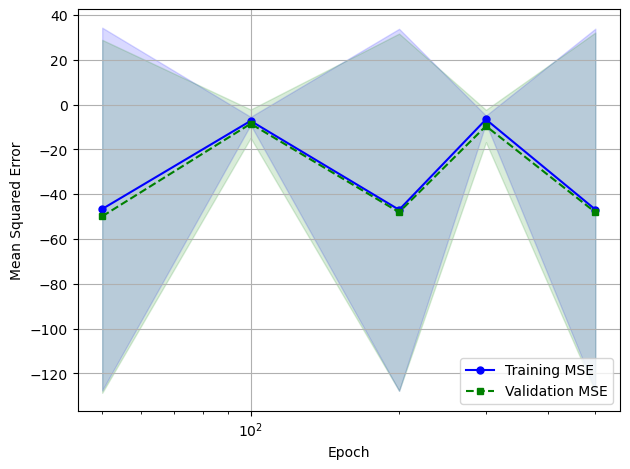

In [15]:
param_range = [50, 100, 200, 300, 500]

train_scores, test_scores = validation_curve(
                estimator=estimator, 
                X=X_train, 
                y=y_train, 
                param_name='epochs', 
                param_range=param_range,
                n_jobs=-1,
                scoring = 'neg_mean_squared_error',
                verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training MSE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation MSE')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

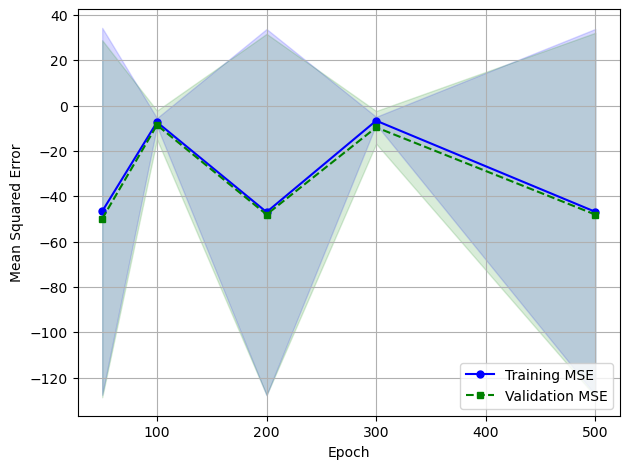

In [24]:
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training MSE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation MSE')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
# plt.xscale('tt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        log')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
# plt.axis([0,500, -20, 0])
plt.tight_layout()
plt.show()

# Visualizing learning curves

[learning_curve] Training set sizes: [  5000  10000  50000 100000 400000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
2023-05-21 22:11:43.046478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 22:11:43.046478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 22:11:43.048727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions 

12500/12500 [==============================] - 8s 676us/step


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.9min finished


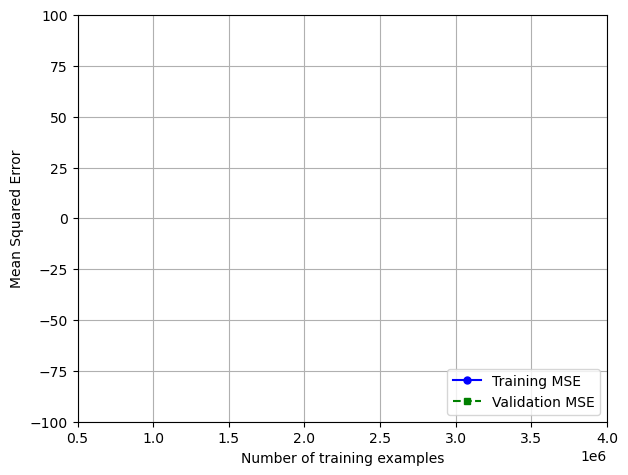

In [25]:
train_sizes = [5000, 10000, 50000, 100000, 400000]

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=estimator,
                               X=X_train,
                               y=y_train,
                               train_sizes=train_sizes,
                               n_jobs=-1,
                               scoring = 'neg_mean_squared_error', 
                               verbose=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MSE')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MSE')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='lower right')
plt.tight_layout()
plt.axis([500000,4000000, -100, 100])
plt.show()


ValueError: 'top right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

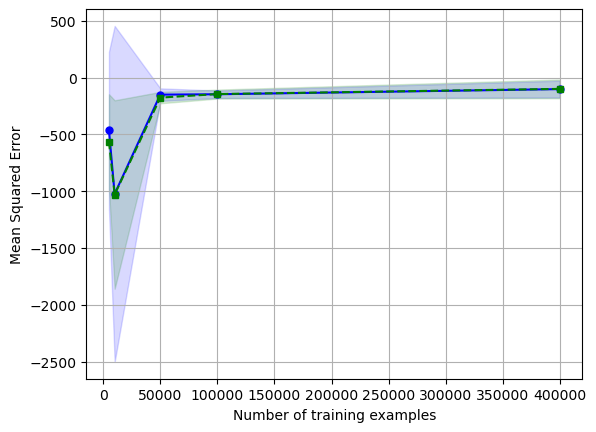

In [51]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MSE')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MSE')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='top right')
# plt.tight_layout()
plt.axis([100,400000, -150, 0])
# plt.show()

In [39]:
train_scores

array([[-1844.3166827 ,  -133.59180053,   -68.65913845,  -192.8710696 ,
          -75.80292739],
       [ -162.18118605, -3963.71044087,   -63.19391377,  -387.66001135,
         -541.7113832 ],
       [ -167.97049499,   -47.09171524,  -204.78380954,  -141.31058597,
         -185.62330924],
       [ -137.32600786,  -159.18806351,  -202.03651753,  -111.91658193,
         -118.88379236],
       [  -47.96551302,  -208.35885173,   -39.62920837,  -171.64140206,
          -35.77075119]])